In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
aisles_df = pd.read_csv('aisles.csv')
departments_df = pd.read_csv('departments.csv')
orders_df = pd.read_csv('orders.csv')
products_df = pd.read_csv('products.csv')
order_products_prior_df = pd.read_csv('order_products__prior.csv')
order_products_train_df = pd.read_csv('order_products__train.csv')

In [3]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


         orders_num
user_id            
53684           100
201623          100
50817           100
176951          100
88911           100
...             ...
24224             4
199509            4
32420             4
21310             4
196830            4

[206209 rows x 1 columns]


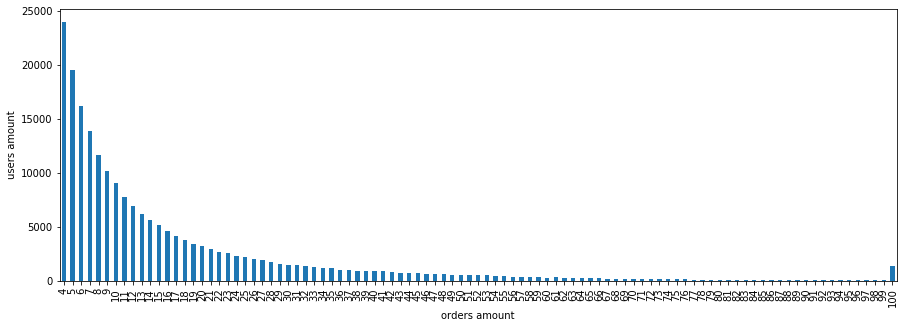

In [4]:
# 1 - number of orders per user
orders_per_user_df = orders_df['user_id'].value_counts().to_frame('orders_num')
orders_per_user_df.index.names = ['user_id']
print(orders_per_user_df)
ax = orders_per_user_df['orders_num'].value_counts(sort=False).plot.bar(figsize=(15,5))
ax.set_xlabel('orders amount')
ax.set_ylabel('users amount')
plt.show()

In [5]:
# 2 - percentage of missing values
missing_rate = orders_df.isna().any(axis=1).sum() / len(orders_df)
print('orders has {:.2f}% of missing data\n'.format(missing_rate * 100))
orders_df.isna().sum().to_frame('missing_data')

orders has 6.03% of missing data



,missing_data
order_id,0
user_id,0
eval_set,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,206209


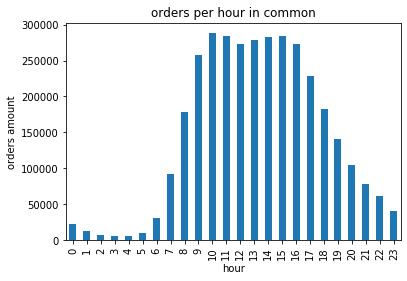

In [6]:
# 3 - distribution by hours in common
ax = pd.value_counts(orders_df['order_hour_of_day']).sort_index().plot.bar(title='orders per hour in common')
ax.set_xlabel('hour')
ax.set_ylabel('orders amount')
plt.show()

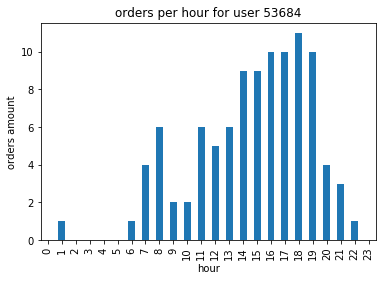

In [7]:
# 3 - distribution by hours for user
user_id = 53684
ax = orders_df['user_id'].eq(user_id).astype(int).groupby(orders_df['order_hour_of_day']).sum().plot.bar()
plt.title('orders per hour for user ' + str(user_id))
ax.set_xlabel('hour')
ax.set_ylabel('orders amount')
plt.show()

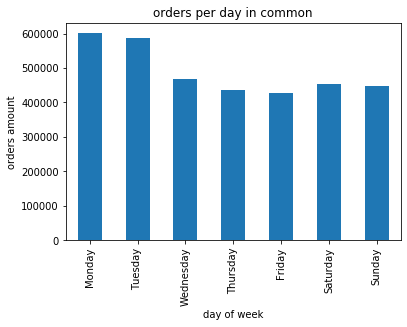

In [8]:
# 4 - distribution by day of week in common
import calendar
dow_distr = pd.value_counts(orders_df['order_dow']).sort_index()
dow_distr.index = calendar.day_name
ax = dow_distr.plot.bar(title='orders per day in common')
ax.set_xlabel('day of week')
ax.set_ylabel('orders amount')
plt.show()

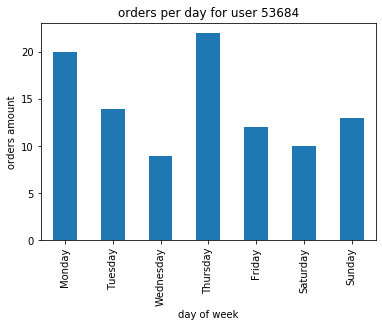

In [9]:
# 4 - distribution of orders by day of week for user
dow_distr = orders_df['user_id'].eq(user_id).astype(int).groupby(orders_df['order_dow']).sum()
dow_distr.index = calendar.day_name
ax = dow_distr.plot.bar(title='orders per day for user ' + str(user_id))
ax.set_xlabel('day of week')
ax.set_ylabel('orders amount')
plt.show()

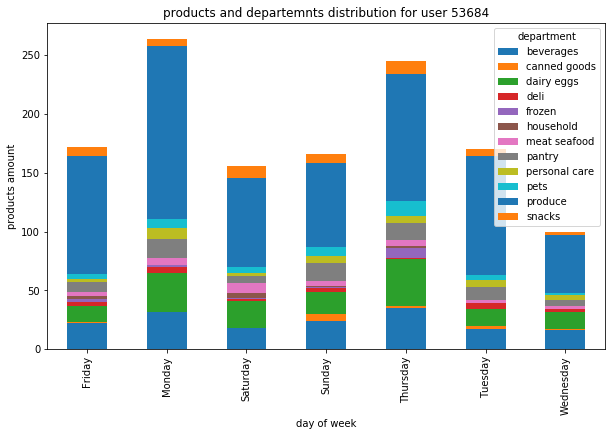

In [16]:
# 4 - distribution of products and departments by day of week for user
user_products = orders_df.loc[orders_df['user_id'] == user_id]
user_products = pd.merge(order_products_prior_df, user_products, on = 'order_id')
user_products = pd.merge(user_products, products_df, on = 'product_id')
user_products = pd.merge(user_products, departments_df, on = 'department_id')
user_products['order_dow'] = user_products['order_dow'].apply(lambda x: calendar.day_name[x])
ax = user_products.groupby(['order_dow', 'department']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,6))
ax.set_xlabel('day of week')
ax.set_ylabel('products amount')
plt.title('products and departemnts distribution for user ' + str(user_id))
plt.show()

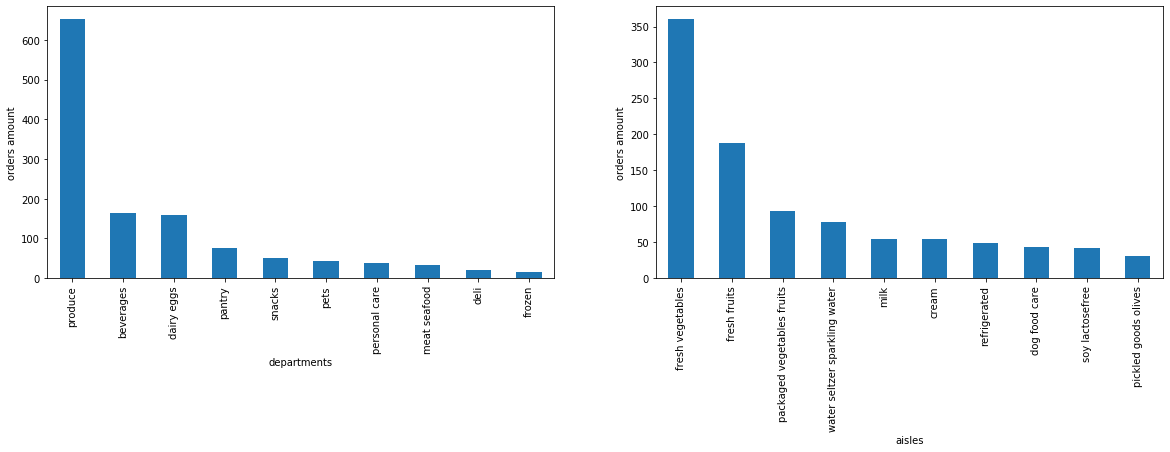

,orders_amount
Italian Sparkling Mineral Water,77
Organic Hass Avocado,56
Organic Half & Half,54
100% Raw Coconut Water,49
Organic Lemon,39
"Organic Red Radish, Bunch",38
Red Peppers,36
Apple Honeycrisp Organic,35
Organic White Onions,33
Organic Raspberries,33


In [14]:
# 5 - how often user bought smth
user_orders_df = orders_df.loc[orders_df['user_id'] == user_id]
user_orders_df = pd.merge(order_products_prior_df, user_orders_df, on = 'order_id')
user_orders_df = pd.merge(user_orders_df, products_df, on = 'product_id')
user_orders_df = pd.merge(user_orders_df, aisles_df, on = 'aisle_id')
user_orders_df = pd.merge(user_orders_df, departments_df, on = 'department_id')

fig, ax = plt.subplots(nrows=1, ncols=2)
ax1 = user_orders_df['department'].value_counts().head(10).plot.bar(ax=ax[0], figsize=(20,5))
ax1.set_xlabel('departments')
ax1.set_ylabel('orders amount')
ax2 = user_orders_df['aisle'].value_counts().head(10).plot.bar(ax=ax[1])
ax2.set_xlabel('aisles')
ax2.set_ylabel('orders amount')
plt.show()

user_orders_df['product_name'].value_counts().head(10).to_frame('orders_amount')

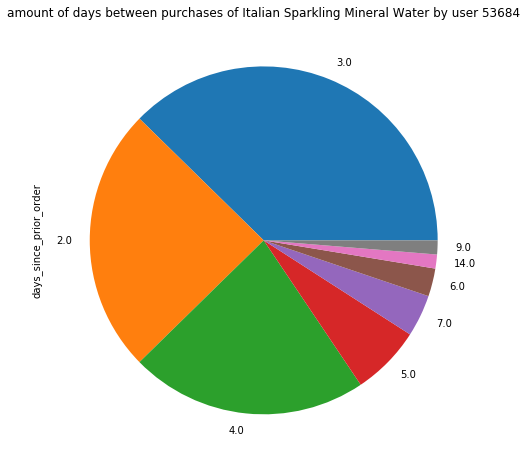

In [12]:
# 5
product_name = 'Italian Sparkling Mineral Water'
user_orders_with_product = user_orders_df.loc[user_orders_df['product_name'] == product_name]
user_orders_with_product['days_since_prior_order'].value_counts().plot.pie(figsize=(8,8))
plt.title('amount of days between purchases of ' + product_name + ' by user ' + str(user_id))
plt.show()

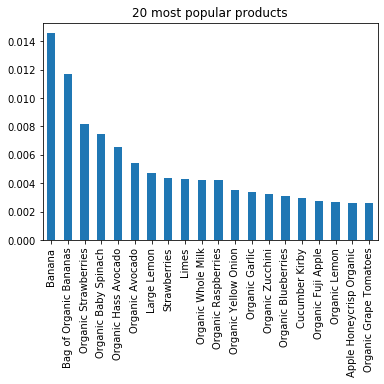

In [17]:
# 6 - popular products
merged_prior_df = pd.merge(order_products_prior_df, products_df, on = 'product_id')
ax = merged_prior_df['product_name'].value_counts(normalize=True).head(20).plot.bar()
plt.title('20 most popular products')
plt.show()